In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# ucitavanje podataka
data = pd.read_csv('/content/drive/MyDrive/data_1.csv',header=None)
data = data.values

# standardizacija parametara
mean = np.mean(data[:,0:13],axis=0)
std = np.std(data[:,0:13],axis=0)
for i in range(0,len(mean)):
  data[:,i] = (data[:,i]-mean[i])/std[i]

# podjela na trening, test skup i validacioni skup
x_train, x_validation, y_train, y_validation = train_test_split(data[:,0:13], data[:,13], test_size=0.2)

Text(0.5, 1.0, 'Koeficijenti korelacije prediktora i ciljne promjenjive')

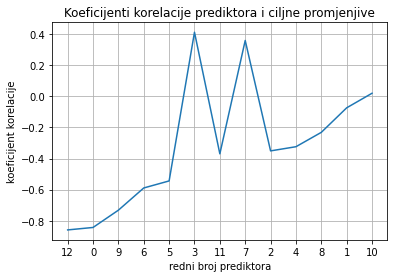

In [12]:
koeficijenti_korelacije = np.zeros(13)

#racunanje koeficijenta korelacije
for i in range(0,13):
  koeficijenti_korelacije[i] = np.corrcoef(x_train[:,i],y_train)[0,1]

# sortiranje koeficijenta 
redosled = np.argsort(abs(koeficijenti_korelacije))
redosled = redosled[::-1]

fig, axs = plt.subplots()
plt.plot(koeficijenti_korelacije[redosled])
plt.grid()
plt.title('Koeficijenti korelacije')
axs.set_xticks(np.arange(len(redosled)))
axs.set_xticklabels(redosled) 
plt.xlabel('redni broj prediktora')
plt.ylabel('koeficijent korelacije')
plt.title('Koeficijenti korelacije prediktora i ciljne promjenjive')

In [13]:
matrica_korelacije = np.zeros([13,13])

#racunanje koeficijenta korelacije
for i in range(0,13):
  for j in range(0,13):
    if i==j:
      matrica_korelacije[i,j] = np.corrcoef(x_train[:,i],y_train)[0,1]
    else:
      matrica_korelacije[i,j] = np.corrcoef(x_train[:,i],x_train[:,j])[0,1]

In [25]:
df = pd.DataFrame(matrica_korelacije)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.843462,0.064133,0.148849,-0.481471,0.294214,0.515837,0.535251,-0.304394,0.238224,0.750564,-0.039131,0.260521,0.811223
1,0.064133,-0.073412,0.135369,0.159166,-0.075113,0.033713,0.071139,0.058380,0.075947,-0.084955,-0.385669,0.184906,-0.085921
2,0.148849,0.135369,-0.350571,0.411390,0.313395,0.289009,0.408450,0.144977,0.150803,0.287179,0.019850,0.217209,0.322760
3,-0.481471,0.159166,0.411390,0.413030,-0.041151,-0.194416,-0.118673,0.322937,-0.026026,-0.362681,-0.006764,0.043962,-0.376522
4,0.294214,-0.075113,0.313395,-0.041151,-0.323754,0.251176,0.215503,-0.235502,0.289714,0.313141,0.087860,0.088738,0.412610
5,0.515837,0.033713,0.289009,-0.194416,0.251176,-0.543902,0.865907,-0.423866,0.442237,0.612192,-0.023514,0.484141,0.519570
6,0.535251,0.071139,0.408450,-0.118673,0.215503,0.865907,-0.589202,-0.350177,0.555187,0.695718,-0.041421,0.540073,0.533277
7,-0.304394,0.058380,0.144977,0.322937,-0.235502,-0.423866,-0.350177,0.360089,-0.316753,-0.276016,0.075905,-0.473190,-0.366025
8,0.238224,0.075947,0.150803,-0.026026,0.289714,0.442237,0.555187,-0.316753,-0.231274,0.256380,0.058364,0.359631,0.278678
9,0.750564,-0.084955,0.287179,-0.362681,0.313141,0.612192,0.695718,-0.276016,0.256380,-0.732191,-0.047685,0.192811,0.752922


In [15]:
koeficijenti_korelacije

array([[-0.84346216,  0.06413312,  0.14884905, -0.48147085,  0.29421419,
         0.51583683,  0.53525059, -0.30439438,  0.23822445,  0.75056361,
        -0.03913115,  0.26052142,  0.81122347],
       [ 0.06413312, -0.07341163,  0.13536938,  0.15916633, -0.07511282,
         0.0337127 ,  0.07113927,  0.0583802 ,  0.07594712, -0.08495533,
        -0.3856695 ,  0.18490603, -0.08592114],
       [ 0.14884905,  0.13536938, -0.35057107,  0.41138983,  0.31339451,
         0.28900881,  0.40844972,  0.14497684,  0.15080295,  0.28717884,
         0.01984985,  0.2172089 ,  0.32276009],
       [-0.48147085,  0.15916633,  0.41138983,  0.41303011, -0.04115146,
        -0.19441618, -0.11867251,  0.32293679, -0.02602608, -0.36268125,
        -0.00676387,  0.04396222, -0.37652195],
       [ 0.29421419, -0.07511282,  0.31339451, -0.04115146, -0.32375402,
         0.25117621,  0.21550314, -0.23550231,  0.28971397,  0.31314072,
         0.08785981,  0.08873836,  0.41261003],
       [ 0.51583683,  0.033712

In [ ]:
x_train = x_train[:,redosled]
x_validation = x_validation[:,redosled]

In [ ]:
def accuracy(x,y):
  cm = confusion_matrix(x,y)
  return cm[0,0] + cm[1,1]


Text(0.5, 1.0, 'Tacnost kasifikacije u zavisnosti od broja prediktora')

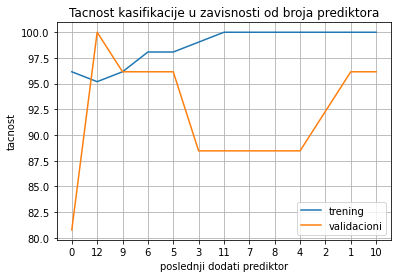

In [ ]:
acc_train = np.zeros(len(redosled))
acc_validation = np.zeros(len(redosled))

for i in range(0,len(redosled)):
    clf = LogisticRegression().fit(x_train[:,0:i+1],y_train)
    y_predict = clf.predict(x_train[:,0:i+1])
    acc_train[i] = accuracy(y_train,y_predict)
    y_predict = clf.predict(x_validation[:,0:i+1])
    acc_validation[i] = accuracy(y_validation,y_predict)

acc_train = acc_train/len(y_train) * 100
acc_validation = acc_validation/len(y_validation) * 100

fig, axs = plt.subplots()
plt.plot(acc_train)
plt.plot(acc_validation)
axs.set_xticks(np.arange(len(redosled)))
axs.set_xticklabels(redosled) 
plt.grid()
plt.legend(['trening','validacioni'])
plt.xlabel('poslednji dodati prediktor')
plt.ylabel('tacnost')
plt.title('Tacnost kasifikacije u zavisnosti od broja prediktora')

In [ ]:
def logisticka_regresija(x,y,alpha):
  N = 100
  if len(x.shape)==2:
    br_prediktora = x.shape[1]
    x = np.append(np.ones(len(x)).reshape(len(x),1),x,axis=1)
  else:
    br_prediktora = 1
    x = np.column_stack((np.ones(len(x)).reshape(len(x),1),x))
  
  br_prediktora = br_prediktora + 1
  theta =  np.zeros(br_prediktora)
  fi = 0

  # procjena optimalnih parametara
  for epoha in range(0,N): # po epohama
    delta_J = np.zeros(br_prediktora)
    for i in range(0,len(x)):
      fi = 1/(1 + np.exp(-np.dot(theta,x[i,:])))
      delta_J = delta_J + (y[i] - fi)*x[i,:]
    theta = theta + alpha*delta_J/N

  return theta

In [ ]:
def acc(x,y,theta):

  if len(x.shape)==2:
    x = np.append(np.ones(len(x)).reshape(len(x),1),x,axis=1)
  else:
    x = np.column_stack((np.ones(len(x)).reshape(len(x),1),x))
  y_pred = np.zeros(len(x))

  for i in range(0,len(x)):
    fi = 1/(1 + np.exp(-np.dot(theta,x[i,:])))
    if fi>=0.5:
      y_pred[i] = 1

  cm = confusion_matrix(y,y_pred)

  return cm[0,0] + cm[1,1]

Text(0.5, 1.0, 'Tacnost kasifikacije u zavisnosti od broja prediktora')

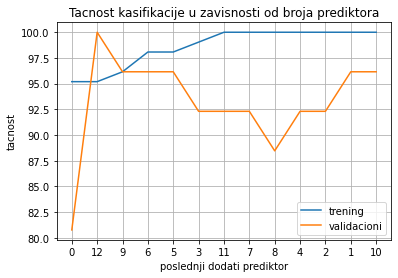

In [ ]:
acc_train = np.zeros(len(redosled))
acc_validation = np.zeros(len(redosled))
alpha = np.linspace(0.00001,10,20)
alpha_opt = np.zeros(len(redosled))

for i in range(0,len(redosled)):
  alpha_optimalno = 0
  for j in range(0,len(alpha)):
    theta = logisticka_regresija(x_train[:,0:i+1],y_train,alpha[j])
    acc_val = acc(x_validation[:,0:i+1],y_validation,theta)
    if acc_val >= acc_validation[i]:
      acc_validation[i] = acc_val
      alpha_optimalno = alpha[i]
  theta = logisticka_regresija(x_train[:,0:i+1],y_train,alpha_optimalno)
  alpha_opt[i] = alpha_optimalno
  acc_train[i] = acc(x_train[:,0:i+1],y_train,theta)

acc_train = acc_train/len(y_train) * 100
acc_validation = acc_validation/len(y_validation) * 100

fig, axs = plt.subplots()
plt.plot(acc_train)
plt.plot(acc_validation)
axs.set_xticks(np.arange(len(redosled)))
axs.set_xticklabels(redosled) 
plt.grid()
plt.legend(['trening','validacioni'])
plt.xlabel('poslednji dodati prediktor')
plt.ylabel('tacnost')
plt.title('Tacnost kasifikacije u zavisnosti od broja prediktora')

Algoritam omotac

Text(0.5, 1.0, 'Tacnost kasifikacije u zavisnosti od broja prediktora')

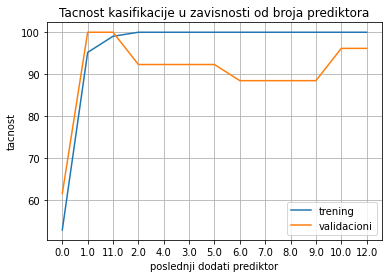

In [ ]:
#x_train, x_validation, y_train, y_validation = train_test_split(data[:,0:13], data[:,13], test_size=0.2)

x = []
x_val = []
preostala_obiljezja = 13
acc_train = np.zeros(13)
acc_validation = np.zeros(13)
redosled = np.zeros(13)
reodosled_obiljlezja = np.arange(13)
alpha = np.linspace(0,10,20)
alpha_opt = np.zeros(13)

for i in range(0,13): # po obiljezjima koje dodajemo
  acc_pom = np.zeros(preostala_obiljezja)
  for j in range(0,preostala_obiljezja): # provjera koje sledece dodati
    alpha_optimalno = 0
    for k in range(0,len(alpha)): # odredjivanje optimalne stope ucenja
      if i==0:
        theta = logisticka_regresija(x_train[:,j],y_train,alpha[k])
        acc_val = acc(x_validation[:,j],y_validation,theta)
      else:
        theta = logisticka_regresija(np.column_stack((x,x_train[:,j])),y_train,alpha[k])
        acc_val = acc(np.column_stack((x_val,x_validation[:,j])),y_validation,theta)
      if acc_val >= acc_validation[i]:
        acc_validation[i] = acc_val
        alpha_optimalno = alpha[i]
    # odredjivanje optimalnih parametara sa optimalnom stopom ucenja
    if i==0:
      theta = logisticka_regresija(x_train[:,j],y_train,alpha_optimalno)
      acc_pom[j] = acc(x_train[:,j],y_train,theta)
    else:
      theta = logisticka_regresija(np.column_stack((x,x_train[:,j])),y_train,alpha_optimalno)
      acc_pom[j] = acc(np.column_stack((x,x_train[:,j])),y_train,theta)
    alpha_opt[j] = alpha_optimalno
  # zadrzavanje samo najboljeg obiljezja
  indeks = np.argmax(acc_pom)
  if i==0:
    x = x_train[:,indeks]
    x_val = x_validation[:,indeks]
  else:
    x = np.column_stack((x,x_train[:,indeks]))
    x_val = np.column_stack((x_val,x_validation[:,indeks]))
  # procjena parametara
  theta = logisticka_regresija(x,y_train,alpha_opt[indeks])
  # tacnost 
  acc_train[i] = acc(x,y_train,theta)
  acc_validation[i] = acc(x_val,y_validation,theta)
  x_train = np.delete(x_train,indeks,axis=1)
  x_validation = np.delete(x_validation,indeks,axis=1)
  preostala_obiljezja = preostala_obiljezja - 1
  redosled[i] = reodosled_obiljlezja[indeks]
  reodosled_obiljlezja = np.delete(reodosled_obiljlezja,indeks)

acc_train = acc_train/len(y_train)*100
acc_validation = acc_validation/len(y_validation)*100

fig, axs = plt.subplots()
plt.plot(acc_train)
plt.plot(acc_validation)
axs.set_xticks(np.arange(len(redosled)))
axs.set_xticklabels(redosled) 
plt.grid()
plt.legend(['trening','validacioni'])
plt.xlabel('poslednji dodati prediktor')
plt.ylabel('tacnost')
plt.title('Tacnost kasifikacije u zavisnosti od broja prediktora')

In [ ]:
x_train = x 
x_validation = x_val  